In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import re
%matplotlib inline 
import matplotlib.pyplot as plt

In [2]:


housing = pd.read_csv('Ames_HousePrice.csv', index_col=0)
real_est = pd.read_csv('Ames Real Estate Data.csv')
housing.shape

C:\Anaconda\lib\site-packages\IPython\core\interactiveshell.py:3145: DtypeWarning: Columns (36,40,81,87) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


(2580, 81)

In [3]:
housing.head()

,PID,GrLivArea,SalePrice,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
1,909176150,856,126000,30,RL,NaN,7890,Pave,NaN,Reg,...,166,0,NaN,NaN,NaN,0,3,2010,WD,Normal
2,905476230,1049,139500,120,RL,42.0,4235,Pave,NaN,Reg,...,0,0,NaN,NaN,NaN,0,2,2009,WD,Normal
3,911128020,1001,124900,30,C (all),60.0,6060,Pave,NaN,Reg,...,0,0,NaN,NaN,NaN,0,11,2007,WD,Normal
4,535377150,1039,114000,70,RL,80.0,8146,Pave,NaN,Reg,...,111,0,NaN,NaN,NaN,0,5,2009,WD,Normal
5,534177230,1665,227000,60,RL,70.0,8400,Pave,NaN,Reg,...,0,0,NaN,NaN,NaN,0,11,2009,WD,Normal


running a lasso on all your features to get a hint on what to drop

In [4]:
housing.columns

Index(['PID', 'GrLivArea', 'SalePrice', 'MSSubClass', 'MSZoning',
       'LotFrontage', 'LotArea', 'Street', 'Alley', 'LotShape', 'LandContour',
       'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1',
       'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'ExterQual', 'ExterCond',
       'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1',
       'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF',
       '2ndFlrSF', 'LowQualFinSF', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond

### How Does Price/SqrFt Play a Role in Housing Data Analytics?

In [5]:
from sklearn.feature_selection import f_regression
from sklearn.linear_model import LinearRegression

In [6]:
price        = housing['SalePrice']
size_related = housing.filter(regex='SF$|Area$')
size_related.head()

,GrLivArea,LotArea,MasVnrArea,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GarageArea,WoodDeckSF,OpenPorchSF,PoolArea
1,856,7890,0.0,618.0,856.0,856,0,0,399.0,0,0,0
2,1049,4235,149.0,104.0,1049.0,1049,0,0,266.0,0,105,0
3,1001,6060,0.0,100.0,837.0,1001,0,0,216.0,154,0,0
4,1039,8146,0.0,405.0,405.0,717,322,0,281.0,0,0,0
5,1665,8400,0.0,167.0,810.0,810,855,0,528.0,0,45,0


In [7]:
size_related =housing.filter(regex='SF$|Area$')

In [8]:
size_related.isnull().sum(axis=0)

GrLivArea        0
LotArea          0
MasVnrArea      14
BsmtUnfSF        1
TotalBsmtSF      1
1stFlrSF         0
2ndFlrSF         0
LowQualFinSF     0
GarageArea       1
WoodDeckSF       0
OpenPorchSF      0
PoolArea         0
dtype: int64

In [9]:
size_related = size_related.fillna(0.0)  # We fill the very minor missing values by 0.0
F_values, p_values = f_regression(size_related, housing['SalePrice'])

pd.Series(p_values, index=size_related.columns).sort_values()

GrLivArea        0.000000e+00
TotalBsmtSF     7.306053e-313
1stFlrSF        1.616946e-300
GarageArea      6.423062e-291
MasVnrArea      4.164095e-162
WoodDeckSF       6.015295e-68
OpenPorchSF      2.930048e-57
LotArea          8.303020e-46
2ndFlrSF         4.007008e-42
BsmtUnfSF        8.441921e-18
PoolArea         1.172748e-01
LowQualFinSF     1.173873e-01
dtype: float64

<AxesSubplot:>

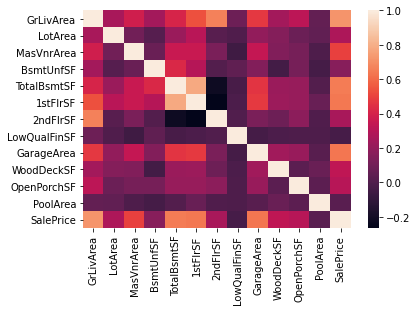

In [10]:
import seaborn as sns
corr = pd.concat([size_related, housing['SalePrice']], axis=1).corr()
sns.heatmap(corr)

### GrLivArea 

Most of the size related columns have significant p-values on their correlations with **SalePrice**. The **Gross Living Area** (GrLivArea) has a vanishing p-value, which indicates a very strong statistical relationship. We will focus our research on **GrLivArea**.

<AxesSubplot:xlabel='GrLivArea', ylabel='SalePrice'>

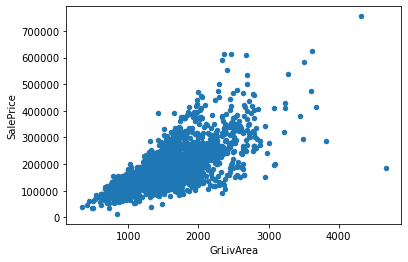

In [11]:
housing[['GrLivArea', 'SalePrice']].plot(kind='scatter', x='GrLivArea', y='SalePrice')

### A Large Variation in Price/SqrFt

The scatterplot above displays a fan-like structure which widens for larger houses. Considering straight lines through the origin, the slopes of these lines indicate the price per square-foot.

The above plot suggests a wide range of $price/foot^2$ among the houses in Ames. If we fit a naive simple linear model, the constant variance assumption of simple linear regression would be seriously violated.

The question is: how do we model this effectively? Luckily, pandas scatterplot has **logx** and **logy** arguments, which give us an important hint.

<AxesSubplot:xlabel='GrLivArea', ylabel='SalePrice'>

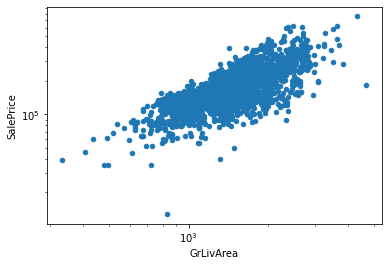

In [12]:
housing[['GrLivArea', 'SalePrice']].plot(kind='scatter', x='GrLivArea', y='SalePrice', logx=True, logy=True)

After taking the log-log scatterplot, the fan-like structure disappears and the scatterplot can be approximated by a parallel family of line segments.

In [13]:
lm = LinearRegression()
grLivArea = size_related[['GrLivArea']]
lm.fit(grLivArea, price)
lm.score(grLivArea, price)

0.5183732056699006

In [14]:
lm.fit(np.log10(grLivArea), np.log10(price))
lm.score(np.log10(grLivArea), np.log10(price))

0.5400973491971155

Schematically, the above log-log linear regression can be expressed as

$$log(price) = \beta_0 +\beta_1\cdot log(area) + \epsilon$$

or equivalently,

$$price = 10^{\beta_0} \cdot area^{\beta_1}\cdot 10^{\epsilon}$$

which we can then use to plug in our values

$${price\over area} = 10^{2.44}\cdot area^{-0.12}\cdot 10^{\epsilon}$$

This suggests an approximate formula for $price/ft^2$, which has been the yard-stick for all the housing transactions. Note that the negative exponent $-0.12$ above the area variable is $\beta_1-1$. The above formula suggests that $price/ft^2$ would drop for larger houses. In your data analytics, you should **investigate a plausible reason** for this price drop.

In [15]:
Nbr_quantile = housing.groupby('Neighborhood')['GrLivArea'].quantile(0.8)
joint_Nbr_quantile = pd.merge(housing[['Neighborhood']], Nbr_quantile, how='left', left_on='Neighborhood', right_index=True)

In [16]:
smaller_home = grLivArea.GrLivArea < joint_Nbr_quantile.GrLivArea
lm.fit(np.log10(grLivArea)[smaller_home], np.log10(price)[smaller_home])
lm.intercept_, lm.coef_

(2.085009197724225, array([0.99983166]))

In [17]:
lm.fit(np.log10(grLivArea)[~smaller_home],np.log10(price)[~smaller_home])
lm.intercept_, lm.coef_

(1.4706789908596356, array([1.16147633]))

### The Price Pressure on Larger Homes
The homes with living areas below the $80\%$ quantile **on average** follow a very simple relationship ${price\over area} \sim \$120/ft^2$. 

Larger homes (top $20\%$) follow a different relationship $${price\over area} \sim 29.5\cdot area^{0.16}$$
which is about $\$105$ for a $2500$ square-foot home.

This discount, or price pressure on larger homes, is why $\beta_1\sim 0.88$ if we aggregate all the homes together. In your data analysis, you should provide some clues about the origin of this price discount.

In [18]:
housing.columns

Index(['PID', 'GrLivArea', 'SalePrice', 'MSSubClass', 'MSZoning',
       'LotFrontage', 'LotArea', 'Street', 'Alley', 'LotShape', 'LandContour',
       'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1',
       'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'ExterQual', 'ExterCond',
       'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1',
       'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF',
       '2ndFlrSF', 'LowQualFinSF', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond

In [19]:
sizecols = ['GrLivArea', 'LotArea', 'MasVnrArea', 'BsmtUnfSF', 'TotalBsmtSF',
        '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GarageArea', 'WoodDeckSF',
        'OpenPorchSF', 'PoolArea']

---

# Sale Price

<AxesSubplot:>

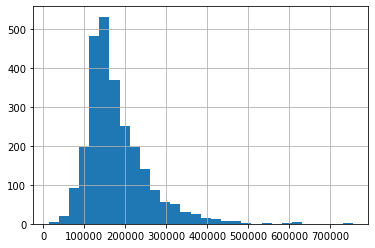

In [20]:
housing['SalePrice'].hist(bins=30)

C:\Anaconda\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='SalePrice'>

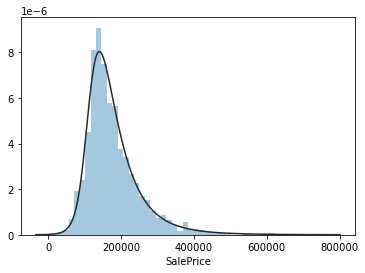

In [21]:
import scipy.stats as st
y = housing['SalePrice']

sns.distplot(y, kde=False, fit=st.johnsonsu)



C:\Anaconda\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='SalePrice'>

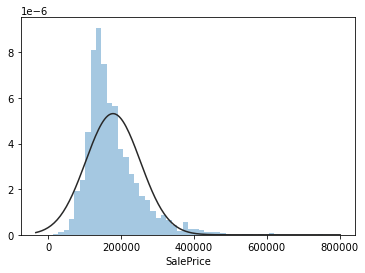

In [22]:
sns.distplot(y, kde=False, fit=st.norm)

C:\Anaconda\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='SalePrice'>

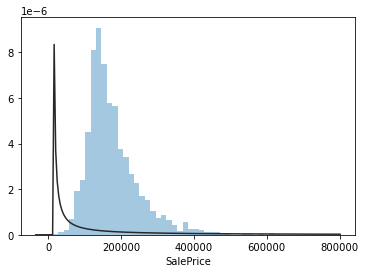

In [23]:
sns.distplot(y, kde=False, fit=st.lognorm)

---

## Not SIZE RELATED --- 

### seperating null/nonnull features

In [24]:
nosize = housing[housing.columns.difference(sizecols)]

In [25]:
nosize.head()

,3SsnPorch,Alley,BedroomAbvGr,BldgType,BsmtCond,BsmtExposure,BsmtFinSF1,BsmtFinSF2,BsmtFinType1,BsmtFinType2,...,SaleCondition,SalePrice,SaleType,ScreenPorch,Street,TotRmsAbvGrd,Utilities,YearBuilt,YearRemodAdd,YrSold
1,0,NaN,2,1Fam,TA,No,238.0,0.0,Rec,Unf,...,Normal,126000,WD,166,Pave,4,AllPub,1939,1950,2010
2,0,NaN,2,TwnhsE,TA,Mn,552.0,393.0,GLQ,ALQ,...,Normal,139500,WD,0,Pave,5,AllPub,1984,1984,2009
3,86,NaN,2,1Fam,TA,No,737.0,0.0,ALQ,Unf,...,Normal,124900,WD,0,Pave,5,AllPub,1930,2007,2007
4,0,NaN,2,1Fam,TA,No,0.0,0.0,Unf,Unf,...,Normal,114000,WD,111,Pave,6,AllPub,1900,2003,2009
5,0,NaN,3,1Fam,TA,No,643.0,0.0,GLQ,Unf,...,Normal,227000,WD,0,Pave,6,AllPub,2001,2001,2009


In [26]:
nosize.corr()

,3SsnPorch,BedroomAbvGr,BsmtFinSF1,BsmtFinSF2,BsmtFullBath,BsmtHalfBath,EnclosedPorch,Fireplaces,FullBath,GarageCars,...,MoSold,OverallCond,OverallQual,PID,SalePrice,ScreenPorch,TotRmsAbvGrd,YearBuilt,YearRemodAdd,YrSold
3SsnPorch,1.000000,-0.045189,0.044348,-0.023102,0.023741,-0.009603,-0.031070,0.018789,0.018270,0.019666,...,0.032243,0.041904,0.014226,-0.021198,0.031260,-0.028316,-0.020298,0.009513,0.028543,0.020958
BedroomAbvGr,-0.045189,1.000000,-0.106504,-0.041332,-0.153395,0.021276,0.050877,0.088086,0.370015,0.108190,...,0.055438,0.004108,0.067466,0.001290,0.151806,0.017624,0.693223,-0.048768,-0.016713,-0.005166
BsmtFinSF1,0.044348,-0.106504,1.000000,-0.058911,0.632603,0.067414,-0.107396,0.278672,0.084518,0.261766,...,-0.003877,-0.064347,0.273919,-0.112468,0.460792,0.102109,0.016554,0.303616,0.156527,0.014207
BsmtFinSF2,-0.023102,-0.041332,-0.058911,1.000000,0.169453,0.101400,0.011894,0.055734,-0.072700,-0.004548,...,-0.002769,0.029990,-0.030383,-0.003342,0.022520,0.055724,-0.053228,-0.009807,-0.051202,0.001040
BsmtFullBath,0.023741,-0.153395,0.632603,0.169453,1.000000,-0.164064,-0.076913,0.150427,-0.022744,0.161022,...,-0.001886,-0.057921,0.173342,-0.044292,0.291080,0.050565,-0.057829,0.229570,0.147388,0.035599
BsmtHalfBath,-0.009603,0.021276,0.067414,0.101400,-0.164064,1.000000,-0.024529,0.037626,-0.038042,-0.029313,...,0.031366,0.085160,-0.050571,0.001853,-0.033802,0.033668,-0.049521,-0.028800,-0.048623,-0.023113
EnclosedPorch,-0.031070,0.050877,-0.107396,0.011894,-0.076913,-0.024529,1.000000,-0.004869,-0.112192,-0.126893,...,-0.006403,0.085910,-0.134291,0.168778,-0.123235,-0.068210,0.020376,-0.360933,-0.205205,0.004786
Fireplaces,0.018789,0.088086,0.278672,0.055734,0.150427,0.037626,-0.004869,1.000000,0.239140,0.321839,...,0.039160,-0.046570,0.387777,-0.108646,0.488184,0.181567,0.299979,0.167188,0.123843,-0.008665
FullBath,0.018270,0.370015,0.084518,-0.072700,-0.022744,-0.038042,-0.112192,0.239140,1.000000,0.472773,...,0.034513,-0.210226,0.508255,-0.154209,0.534982,-0.010236,0.534357,0.450065,0.434877,0.023641
GarageCars,0.019666,0.108190,0.261766,-0.004548,0.161022,-0.029313,-0.126893,0.321839,0.472773,1.000000,...,0.040302,-0.195780,0.581023,-0.221074,0.638801,0.039088,0.353683,0.519494,0.398114,-0.002004


<AxesSubplot:>

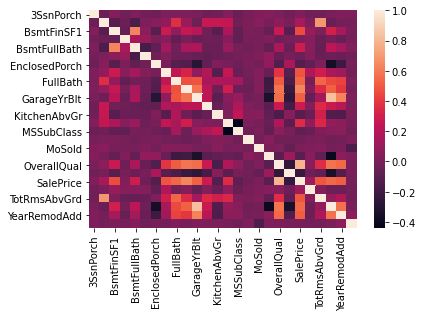

In [27]:
sns.heatmap(nosize.corr())

In [28]:
nosize.isna().mean(axis=0).nlargest(23).round(4) * 100

PoolQC          99.65
MiscFeature     96.24
Alley           93.49
Fence           79.65
FireplaceQu     48.10
LotFrontage     17.91
GarageCond       5.00
GarageFinish     5.00
GarageQual       5.00
GarageYrBlt      5.00
GarageType       4.92
BsmtExposure     2.75
BsmtFinType2     2.71
BsmtCond         2.67
BsmtFinType1     2.67
BsmtQual         2.67
MasVnrType       0.54
BsmtFullBath     0.08
BsmtHalfBath     0.08
BsmtFinSF1       0.04
BsmtFinSF2       0.04
Electrical       0.04
GarageCars       0.04
dtype: float64

In [29]:
nullcols = nosize.columns[nosize.isnull().any()]
nullcols

Index(['Alley', 'BsmtCond', 'BsmtExposure', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtFinType1', 'BsmtFinType2', 'BsmtFullBath', 'BsmtHalfBath',
       'BsmtQual', 'Electrical', 'Fence', 'FireplaceQu', 'GarageCars',
       'GarageCond', 'GarageFinish', 'GarageQual', 'GarageType', 'GarageYrBlt',
       'LotFrontage', 'MasVnrType', 'MiscFeature', 'PoolQC'],
      dtype='object')

In [30]:
nonnullsdf = nosize[nosize.columns.difference(nullcols)]

In [31]:
nonnullsdf

,3SsnPorch,BedroomAbvGr,BldgType,CentralAir,Condition1,Condition2,EnclosedPorch,ExterCond,ExterQual,Exterior1st,...,SaleCondition,SalePrice,SaleType,ScreenPorch,Street,TotRmsAbvGrd,Utilities,YearBuilt,YearRemodAdd,YrSold
1,0,2,1Fam,Y,Norm,Norm,0,TA,TA,Wd Sdng,...,Normal,126000,WD,166,Pave,4,AllPub,1939,1950,2010
2,0,2,TwnhsE,Y,Norm,Norm,0,TA,Gd,HdBoard,...,Normal,139500,WD,0,Pave,5,AllPub,1984,1984,2009
3,86,2,1Fam,Y,Norm,Norm,42,TA,Gd,MetalSd,...,Normal,124900,WD,0,Pave,5,AllPub,1930,2007,2007
4,0,2,1Fam,Y,Norm,Norm,168,Gd,Gd,MetalSd,...,Normal,114000,WD,111,Pave,6,AllPub,1900,2003,2009
5,0,3,1Fam,Y,Norm,Norm,0,TA,Gd,VinylSd,...,Normal,227000,WD,0,Pave,6,AllPub,2001,2001,2009
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
759,0,2,1Fam,N,Norm,Norm,0,TA,TA,Wd Sdng,...,Normal,121000,WD,40,Pave,4,AllPub,1916,1950,2009
760,0,4,1Fam,Y,Norm,Norm,0,TA,TA,BrkFace,...,Normal,139600,WD,0,Pave,8,AllPub,1955,1955,2009
761,0,4,Duplex,N,Norm,Norm,0,TA,TA,MetalSd,...,Normal,145000,WD,0,Pave,8,AllPub,1949,1950,2007
762,0,3,1Fam,Y,Norm,Norm,0,TA,Gd,VinylSd,...,Normal,217500,WD,0,Pave,7,AllPub,2000,2000,2007


---

## Numeric Data

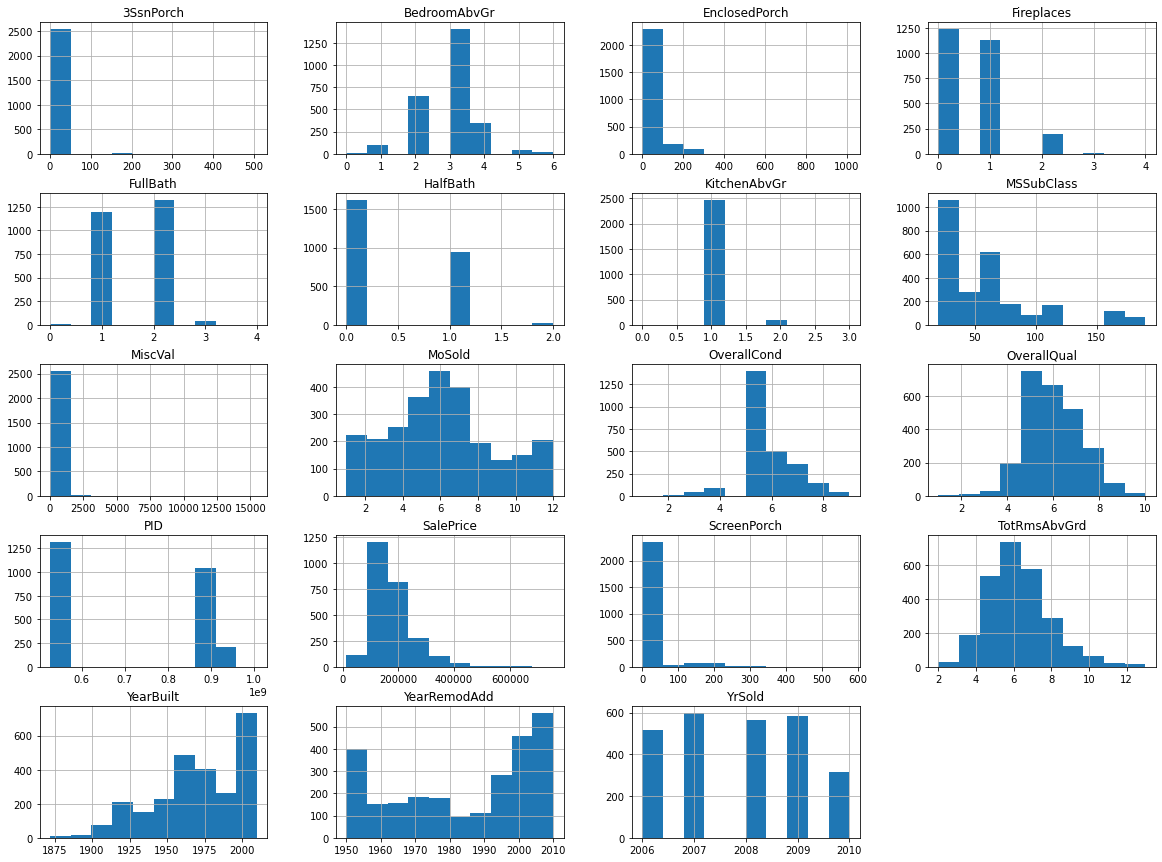

In [32]:
_=nonnullsdf.hist(bins = 10,figsize=(20,15))

In [33]:
quant = [x for x in housing.columns if housing.dtypes[x] != 'object']
quant.remove('SalePrice')


#### Imputing missing vals using 0

In [34]:
housing[['GarageYrBlt','LotFrontage', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF','TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath']]=housing[['LotFrontage', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF','TotalBsmtSF','GarageYrBlt', 'BsmtFullBath', 'BsmtHalfBath']].fillna(0)

C:\Anaconda\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Anaconda\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Anaconda\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings

C:\Anaconda\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Anaconda\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Anaconda\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings

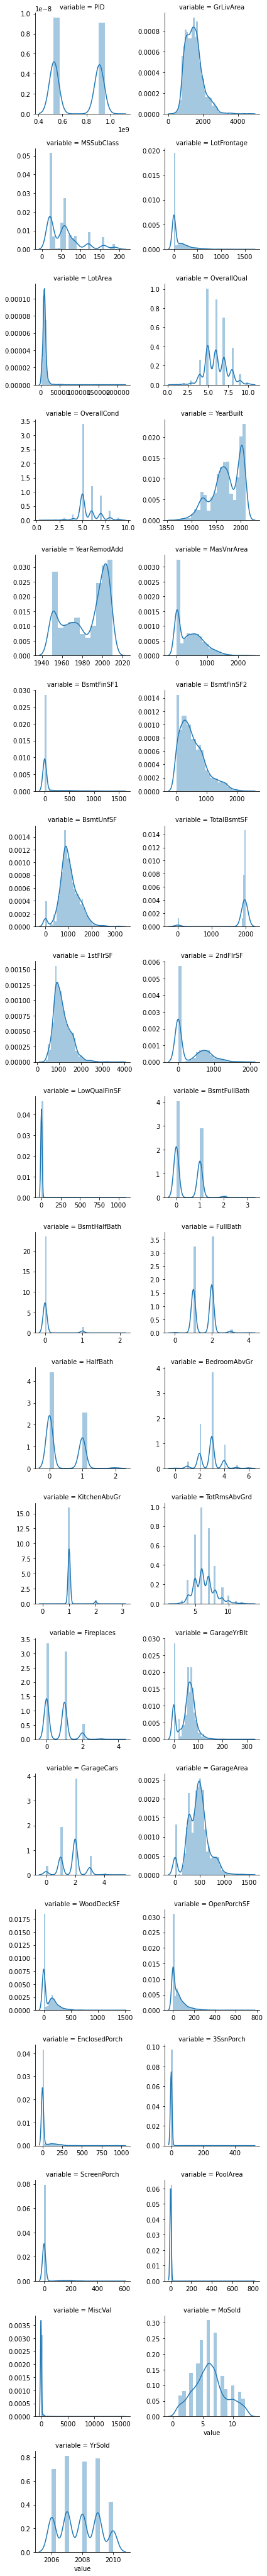

In [35]:
melt = housing.melt(value_vars=quant)
grid = sns.FacetGrid(melt, col="variable",  col_wrap=2, sharex=False, sharey=False)
g = grid.map(sns.distplot, "value")

---

## Categorical data

In [36]:
qual = [x for x in housing.columns if housing.dtypes[x] == 'object']

In [52]:
qual

['MSZoning',
 'Street',
 'Alley',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'PoolQC',
 'Fence',
 'MiscFeature',
 'SaleType',
 'SaleCondition']

In [37]:
for c in qual:
    housing[c] = housing[c].astype('category')
    if housing[c].isnull().any:
        housing[c] = housing[c].cat.add_categories(['MISSING'])
        housing[c] = housing[c].fillna('MISSING')

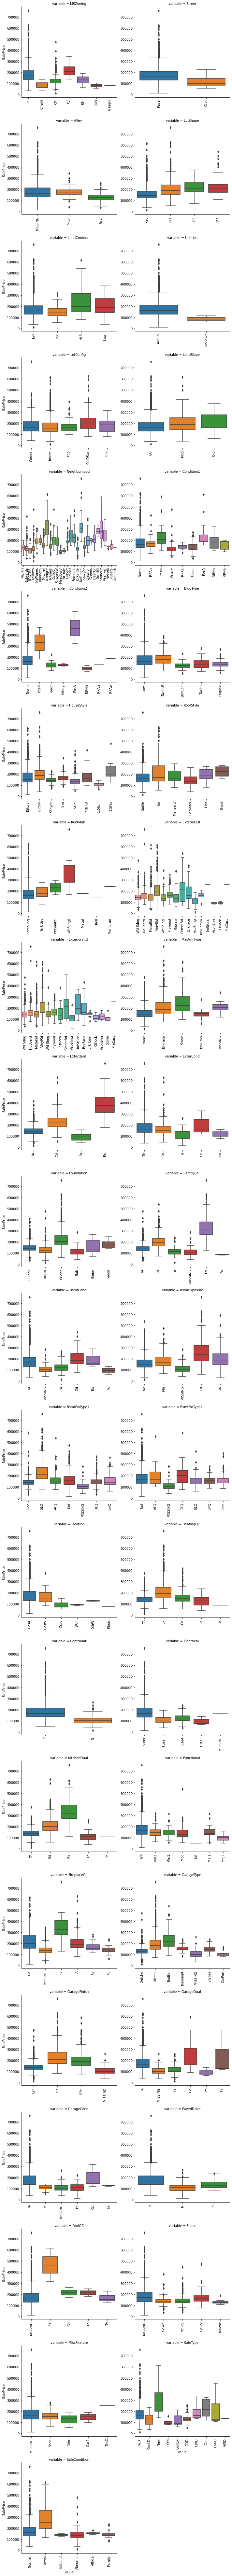

In [38]:
f = housing.melt(id_vars=['SalePrice'], value_vars=qual)
g = sns.FacetGrid(f, col="variable",  col_wrap=2, sharex=False, sharey=False, height=5)
def boxplot(x, y, **kwargs):
    sns.boxplot(x=x, y=y)
    x=plt.xticks(rotation=90)
g = g.map(boxplot, "value", "SalePrice")

---

## Encoding 

In [39]:
def encode(frame, feature):
    ordering = pd.DataFrame()
    ordering['val'] = frame[feature].unique()
    ordering.index = ordering.val
    ordering['spmean'] = frame[[feature, 'SalePrice']].groupby(feature).mean()['SalePrice']
    ordering = ordering.sort_values('spmean')
    ordering['ordering'] = range(1, ordering.shape[0]+1)
    ordering = ordering['ordering'].to_dict()
    
    for cat, o in ordering.items():
        frame.loc[frame[feature] == cat, feature+'_E'] = o
    
qual_encoded = []
for q in qual:  
    encode(housing, q)
    qual_encoded.append(q+'_E')
print(qual_encoded)

['MSZoning_E', 'Street_E', 'Alley_E', 'LotShape_E', 'LandContour_E', 'Utilities_E', 'LotConfig_E', 'LandSlope_E', 'Neighborhood_E', 'Condition1_E', 'Condition2_E', 'BldgType_E', 'HouseStyle_E', 'RoofStyle_E', 'RoofMatl_E', 'Exterior1st_E', 'Exterior2nd_E', 'MasVnrType_E', 'ExterQual_E', 'ExterCond_E', 'Foundation_E', 'BsmtQual_E', 'BsmtCond_E', 'BsmtExposure_E', 'BsmtFinType1_E', 'BsmtFinType2_E', 'Heating_E', 'HeatingQC_E', 'CentralAir_E', 'Electrical_E', 'KitchenQual_E', 'Functional_E', 'FireplaceQu_E', 'GarageType_E', 'GarageFinish_E', 'GarageQual_E', 'GarageCond_E', 'PavedDrive_E', 'PoolQC_E', 'Fence_E', 'MiscFeature_E', 'SaleType_E', 'SaleCondition_E']


## Correlation

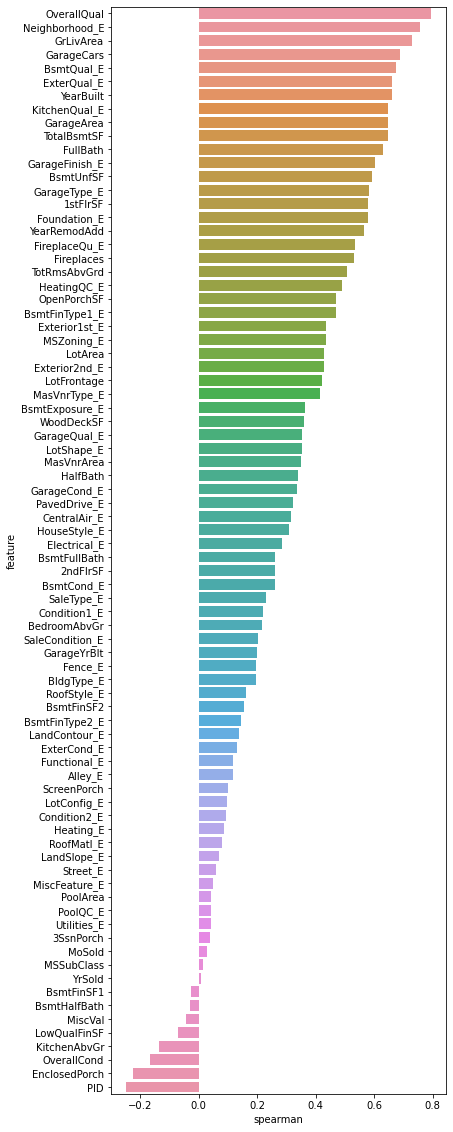

In [40]:
# Spearman correlations shows relationship between nonlinear vals too
def spearman(frame, features):
    spr = pd.DataFrame()
    spr['feature'] = features
    spr['spearman'] = [frame[f].corr(frame['SalePrice'], 'spearman') for f in features]
    spr = spr.sort_values('spearman', ascending = False)
    plt.figure(figsize=(6, 0.25*len(features)))
    sns.barplot(data=spr, y='feature', x='spearman', orient='h')
    
features = quant + qual_encoded
spearman(housing, features)

---

# imputing missing data

In [41]:
housing.columns[housing.isnull().any()]

Index(['GarageCars', 'GarageArea'], dtype='object')

In [42]:
#imputing methods 
'''
imputation by the constant value 0
 - LotFrontage, MasVnrArea, BsmtFinSF1, BsmtFinSF1, BsmtUnfS
 - TotalBsmtSF, BsmtFullBath, BsmtHalfBath
imputation by the mean value of each feature combined with a missing-ness indicator auxiliary variable
 
k nearest neighbor imputation
 - GarageYrBlt, GarageCars, GarageArea
 
iterative imputation
'''

'\nimputation by the constant value 0\n - LotFrontage, MasVnrArea, BsmtFinSF1, BsmtFinSF1, BsmtUnfS\n - TotalBsmtSF, BsmtFullBath, BsmtHalfBath\nimputation by the mean value of each feature combined with a missing-ness indicator auxiliary variable\n \nk nearest neighbor imputation\n - GarageYrBlt, GarageCars, GarageArea\n \niterative imputation\n'

In [43]:
nullcols = ['GarageCars', 'GarageArea','LotFrontage', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF','TotalBsmtSF','GarageYrBlt', 'BsmtFullBath', 'BsmtHalfBath']

In [44]:
housing[nullcols]=housing[nullcols].fillna(0)

In [45]:
housing.isnull().sum().nlargest()

PID           0
GrLivArea     0
SalePrice     0
MSSubClass    0
MSZoning      0
dtype: int64

In [46]:
med = housing['SalePrice'].median()

In [47]:
b_med = housing.loc[housing['SalePrice'] < med]
a_med = housing.loc[housing['SalePrice'] >= med]

## Above Median Sale Price

C:\Anaconda\lib\site-packages\scipy\stats\stats.py:4196: SpearmanRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(SpearmanRConstantInputWarning())


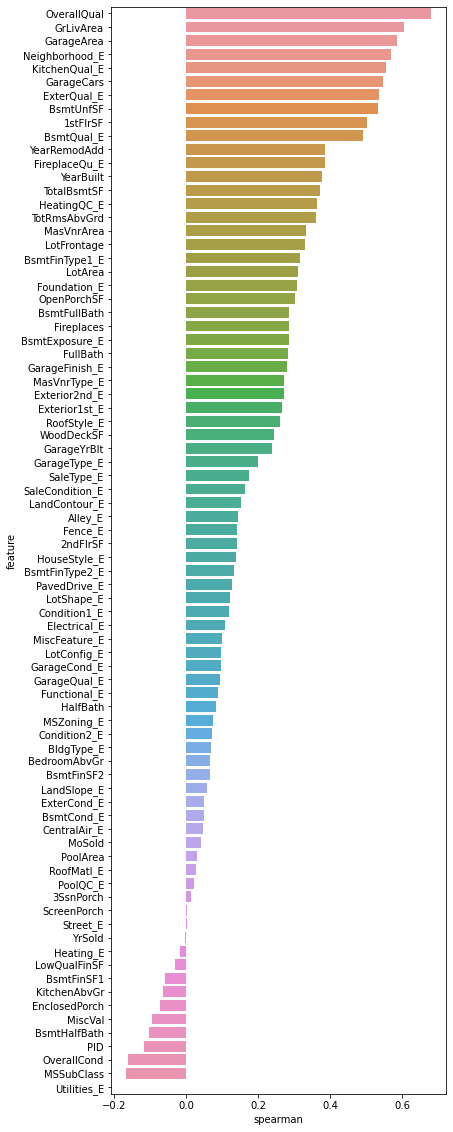

In [48]:
spearman(a_med, features)

## Below Median Sale Price

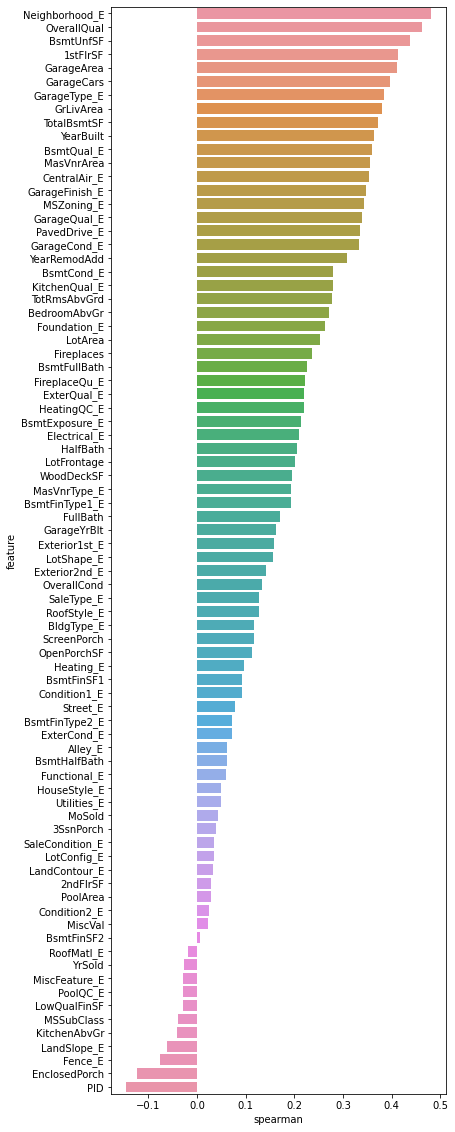

In [49]:
spearman(b_med, features)

# Neighborhood 

In [50]:
nhoods = housing.groupby('Neighborhood')

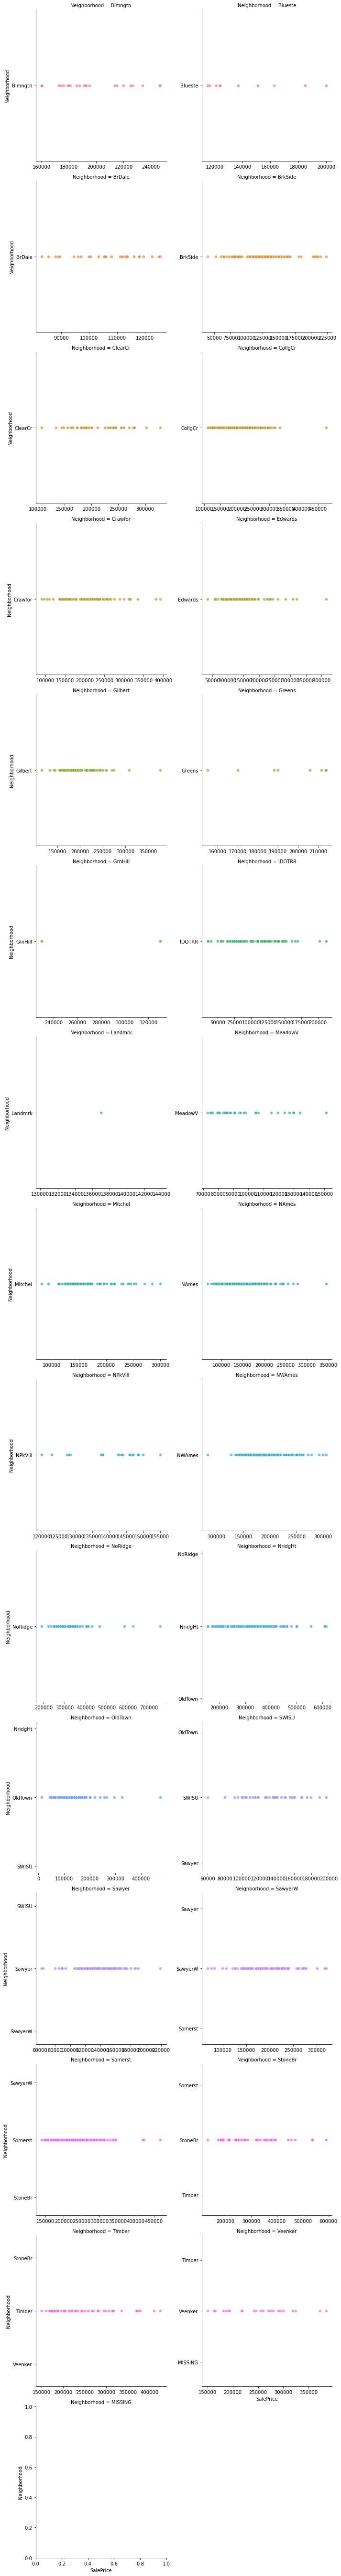

In [51]:
ty = sns.FacetGrid(housing, col="Neighborhood",  hue = "Neighborhood",col_wrap=2, sharex=False, sharey=False, height=5)
ty.map(sns.scatterplot, "SalePrice", "Neighborhood", alpha=.7)

In [53]:
housing.columns

Index(['PID', 'GrLivArea', 'SalePrice', 'MSSubClass', 'MSZoning',
       'LotFrontage', 'LotArea', 'Street', 'Alley', 'LotShape',
       ...
       'GarageType_E', 'GarageFinish_E', 'GarageQual_E', 'GarageCond_E',
       'PavedDrive_E', 'PoolQC_E', 'Fence_E', 'MiscFeature_E', 'SaleType_E',
       'SaleCondition_E'],
      dtype='object', length=124)